# Finally able to do some modelling

In [1]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
from collections import Counter
from sklearn.cross_validation import train_test_split
import diagnostic_plots
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cross_validation import KFold




import numpy as np
import pandas as pd
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing


import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

from statsmodels.graphics.gofplots import ProbPlot
plt.style.use('seaborn') # pretty matplotlib plots
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

%matplotlib inline

/Users/jennwon/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/jennwon/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
joined = pd.read_csv('spotify_fixed.csv')
#d.drop_duplicates(['artist', 'song'], inplace = True)
joined

,Unnamed: 0,artist,song,num_weeks,index_y,acousticness,danceability,duration_ms,energy,genre,...,key,liveness,loudness,mode,popularity,speechiness,tempo,time_signature,valence,0
0,0,2 chainz,4:00 AM,12.0,0,0.12200,0.796,255560.0,0.513,"['hip hop', 'pop', 'pop rap', 'rap', 'southern...",...,6.0,0.1500,-7.140,0.0,83.0,0.4520,75.018,4.0,0.2350,NaN
1,2,2 chainz,proud,2.0,2,0.73800,0.781,234667.0,0.810,"['hip hop', 'pop', 'pop rap', 'rap', 'southern...",...,10.0,0.1440,-4.301,0.0,83.0,0.3560,173.949,4.0,0.9080,NaN
2,586,2 chainz,bigger than you (feat. drake & quavo),2.0,0,0.24700,0.888,225893.0,0.515,"['hip hop', 'pop', 'pop rap', 'rap', 'southern...",...,1.0,0.4460,-6.246,1.0,83.0,0.2710,141.009,4.0,0.2640,NaN
3,1,2 chainz,it's a vibe,20.0,1,0.02630,0.841,210200.0,0.516,"['hip hop', 'pop', 'pop rap', 'rap', 'southern...",...,11.0,0.1110,-7.461,0.0,83.0,0.1180,145.995,4.0,0.5560,NaN
4,3,21 savage,bank account,28.0,1,0.01510,0.884,220307.0,0.346,"['pop', 'rap', 'trap music']",...,8.0,0.0871,-8.228,0.0,84.0,0.3510,75.016,4.0,0.3760,NaN
5,589,21 savage,nightmare,1.0,1,0.44200,0.739,147987.0,0.405,"['pop', 'rap', 'trap music']",...,0.0,0.1580,-10.897,1.0,84.0,0.0852,157.090,4.0,0.1270,NaN
6,590,21 savage,my choppa hate niggas,2.0,3,0.09740,0.862,148640.0,0.274,"['pop', 'rap', 'trap music']",...,0.0,0.1830,-5.818,0.0,84.0,0.4840,77.493,4.0,0.1460,NaN
7,591,21 savage,ghostface killers,7.0,2,0.33100,0.782,268933.0,0.436,"['pop', 'rap', 'trap music']",...,2.0,0.3420,-7.033,1.0,84.0,0.1550,82.994,4.0,0.2430,NaN
8,592,21 savage,x (feat. future),1.0,1,0.37300,0.835,258880.0,0.413,"['pop', 'rap', 'trap music']",...,1.0,0.1010,-9.810,1.0,84.0,0.3960,149.004,4.0,0.1110,NaN
9,593,21 savage,rap saved me,3.0,0,0.00525,0.845,257600.0,0.399,"['pop', 'rap', 'trap music']",...,1.0,0.1020,-7.509,1.0,84.0,0.3090,143.049,4.0,0.1480,NaN


## Because I loaded it from a csv, i need to reform the genre column so that it is a list instead of a string

In [6]:
type(joined.genre[0])

list

In [5]:
import ast
genre_list = []
for genre in joined.genre:
    try:
        test= ast.literal_eval(genre)
        genre_list.append(test)
    except:
        genre_list.append([])
len(genre_list)


#sanity check: did it work?
joined.genre = genre_list
joined.genre  #spoiler alert, it did!

0      [hip hop, pop, pop rap, rap, southern hip hop,...
1      [hip hop, pop, pop rap, rap, southern hip hop,...
2      [hip hop, pop, pop rap, rap, southern hip hop,...
3      [hip hop, pop, pop rap, rap, southern hip hop,...
4                                 [pop, rap, trap music]
5                                 [pop, rap, trap music]
6                                 [pop, rap, trap music]
7                                 [pop, rap, trap music]
8                                 [pop, rap, trap music]
9                                 [pop, rap, trap music]
10                                [pop, rap, trap music]
11                                [pop, rap, trap music]
12                                [pop, rap, trap music]
13                                [pop, rap, trap music]
14                        [boy band, pop, post-teen pop]
15                        [boy band, pop, post-teen pop]
16                                                    []
17                             

My dataframe is called 'joined'

## Loading all the data to make Diagnoistic Plot


In [7]:
joined

,Unnamed: 0,artist,song,num_weeks,index_y,acousticness,danceability,duration_ms,energy,genre,...,key,liveness,loudness,mode,popularity,speechiness,tempo,time_signature,valence,0
0,0,2 chainz,4:00 AM,12.0,0,0.12200,0.796,255560.0,0.513,"[hip hop, pop, pop rap, rap, southern hip hop,...",...,6.0,0.1500,-7.140,0.0,83.0,0.4520,75.018,4.0,0.2350,NaN
1,2,2 chainz,proud,2.0,2,0.73800,0.781,234667.0,0.810,"[hip hop, pop, pop rap, rap, southern hip hop,...",...,10.0,0.1440,-4.301,0.0,83.0,0.3560,173.949,4.0,0.9080,NaN
2,586,2 chainz,bigger than you (feat. drake & quavo),2.0,0,0.24700,0.888,225893.0,0.515,"[hip hop, pop, pop rap, rap, southern hip hop,...",...,1.0,0.4460,-6.246,1.0,83.0,0.2710,141.009,4.0,0.2640,NaN
3,1,2 chainz,it's a vibe,20.0,1,0.02630,0.841,210200.0,0.516,"[hip hop, pop, pop rap, rap, southern hip hop,...",...,11.0,0.1110,-7.461,0.0,83.0,0.1180,145.995,4.0,0.5560,NaN
4,3,21 savage,bank account,28.0,1,0.01510,0.884,220307.0,0.346,"[pop, rap, trap music]",...,8.0,0.0871,-8.228,0.0,84.0,0.3510,75.016,4.0,0.3760,NaN
5,589,21 savage,nightmare,1.0,1,0.44200,0.739,147987.0,0.405,"[pop, rap, trap music]",...,0.0,0.1580,-10.897,1.0,84.0,0.0852,157.090,4.0,0.1270,NaN
6,590,21 savage,my choppa hate niggas,2.0,3,0.09740,0.862,148640.0,0.274,"[pop, rap, trap music]",...,0.0,0.1830,-5.818,0.0,84.0,0.4840,77.493,4.0,0.1460,NaN
7,591,21 savage,ghostface killers,7.0,2,0.33100,0.782,268933.0,0.436,"[pop, rap, trap music]",...,2.0,0.3420,-7.033,1.0,84.0,0.1550,82.994,4.0,0.2430,NaN
8,592,21 savage,x (feat. future),1.0,1,0.37300,0.835,258880.0,0.413,"[pop, rap, trap music]",...,1.0,0.1010,-9.810,1.0,84.0,0.3960,149.004,4.0,0.1110,NaN
9,593,21 savage,rap saved me,3.0,0,0.00525,0.845,257600.0,0.399,"[pop, rap, trap music]",...,1.0,0.1020,-7.509,1.0,84.0,0.3090,143.049,4.0,0.1480,NaN


In [8]:
joined.drop(joined.columns[-1], axis =1, inplace = True)

# All the way to the top (EDA)
I want to do exploratory data analysis of just the songs that were able to crack the top 100 at least once

In [9]:
joined['duration'] = joined.duration_ms / 1000 #to stop making the time in milliseconds and in seconds lol
joined.duration_ms = joined.duration
joined.drop('duration', 1, inplace = True)

#acoustiness is not normally distrbuted there is a lot more at the bottom that the top
#energy is skewed with left tail
#valence has outliers to the right
#speechiness is skewed with right tail
#instrumentalness isnt that helpful
#liveness is skewed with right tail
#need to do counts for keys and mode
#popularity is shifted to the right
#mean of tempo is 120bpm

## I want to look at how all the features relate to each other (if at all) with pairplot

In [ ]:

#sns.pairplot(joined) #lol it doesnt work

# Start modelling

## 1. Trying to my best find my base linear regression model

In [10]:
equation = 'num_weeks ~ acousticness  + danceability + duration_ms + energy + instrumentalness + key + liveness + loudness + mode + popularity + speechiness + tempo + time_signature + valence'
#y, X = patsy.dmatrices(equation, data=train_df, return_type="dataframe")

# Create your model
model = smf.ols(equation, data = joined)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              num_weeks   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     5.922
Date:                Fri, 20 Jul 2018   Prob (F-statistic):           3.68e-11
Time:                        07:47:27   Log-Likelihood:                -2905.5
No. Observations:                 792   AIC:                             5841.
Df Residuals:                     777   BIC:                             5911.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           11.0157      8.346      1.320      0.187      -5.368      27.400
acousticness        -6.7596      1.862     -3.629      0.000     -10.416      -3.104
danceability         0.9755      2.707      0.360      0.719      -4.339       6.290
duration_ms          0.0027      0.008      0.332      0.740      -0.013       0.019
energy              -7.2078      3.548     -2.032      0.043     -14.172      -0.243
instrumentalness    -9.6526      8.318     -1.160      0.246     -25.982       6.677
key                  0.0912      0.094      0.971      0.332      -0.093       0.276
liveness            -6.2568      2.919     -2.144      0.032     -11.987      -0.527
loudness             0.3377      0.233      1.447      0.148      -0.120       0.796
mode                 1.1414      0.735      1.553      0.121      -0.301       2.584
popularity           0.0498      0.022      2.224      0.026       0.006       0.094
speechiness        -14.1956      2.830     -5.015      0.000     -19.752      -8.640
tempo               -0.0113      0.012     -0.981      0.327      -0.034       0.011
time_signature       0.1892      1.787      0.106      0.916      -3.319       3.697
valence              7.6604      1.885      4.064      0.000       3.960      11.361
==============================================================================
Omnibus:                      194.476   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              412.562
Skew:                           1.357   Prob(JB):                     2.59e-90
Kurtosis:                       5.267   Cond. No.                     6.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
joined.describe()

,Unnamed: 0,num_weeks,index_y,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,time_signature,valence
count,802.000000,795.000000,802.000000,801.000000,801.000000,801.000000,801.000000,801.000000,798.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,400.500000,8.994969,1.463840,0.192191,0.679020,214.240059,0.627555,0.006082,5.286967,0.168603,-6.416170,0.614232,78.229713,0.145777,123.118368,3.988764,0.449396
std,231.661751,9.973263,1.111427,0.216134,0.144088,42.441356,0.162235,0.042792,3.747569,0.118733,2.203692,0.487080,16.393205,0.131792,30.503052,0.196529,0.214679
min,0.000000,1.000000,0.000000,0.000239,0.240000,95.467000,0.062800,0.000000,0.000000,0.021500,-16.690000,0.000000,0.000000,0.023200,61.115000,3.000000,0.037000
25%,200.250000,1.000000,0.000000,0.033100,0.585000,189.467000,0.523000,0.000000,1.000000,0.099000,-7.509000,0.000000,75.000000,0.045600,97.053000,4.000000,0.277000
50%,400.500000,4.000000,1.000000,0.114000,0.685000,212.120000,0.635000,0.000000,6.000000,0.123000,-6.183000,1.000000,81.000000,0.086800,122.024000,4.000000,0.437000
75%,600.750000,16.000000,2.000000,0.263000,0.786000,234.829000,0.756000,0.000011,9.000000,0.195000,-4.926000,1.000000,87.000000,0.216000,144.964000,4.000000,0.607000
max,801.000000,55.000000,3.000000,0.968000,0.981000,460.573000,0.953000,0.740000,11.000000,0.792000,0.175000,1.000000,100.000000,0.733000,203.927000,5.000000,0.970000


In [12]:
joined.drop('num_weeks', axis=1)

,Unnamed: 0,artist,song,index_y,acousticness,danceability,duration_ms,energy,genre,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,time_signature,valence
0,0,2 chainz,4:00 AM,0,0.12200,0.796,255.560,0.513,"[hip hop, pop, pop rap, rap, southern hip hop,...",0.000000,6.0,0.1500,-7.140,0.0,83.0,0.4520,75.018,4.0,0.2350
1,2,2 chainz,proud,2,0.73800,0.781,234.667,0.810,"[hip hop, pop, pop rap, rap, southern hip hop,...",0.000000,10.0,0.1440,-4.301,0.0,83.0,0.3560,173.949,4.0,0.9080
2,586,2 chainz,bigger than you (feat. drake & quavo),0,0.24700,0.888,225.893,0.515,"[hip hop, pop, pop rap, rap, southern hip hop,...",0.000000,1.0,0.4460,-6.246,1.0,83.0,0.2710,141.009,4.0,0.2640
3,1,2 chainz,it's a vibe,1,0.02630,0.841,210.200,0.516,"[hip hop, pop, pop rap, rap, southern hip hop,...",0.000720,11.0,0.1110,-7.461,0.0,83.0,0.1180,145.995,4.0,0.5560
4,3,21 savage,bank account,1,0.01510,0.884,220.307,0.346,"[pop, rap, trap music]",0.000007,8.0,0.0871,-8.228,0.0,84.0,0.3510,75.016,4.0,0.3760
5,589,21 savage,nightmare,1,0.44200,0.739,147.987,0.405,"[pop, rap, trap music]",0.211000,0.0,0.1580,-10.897,1.0,84.0,0.0852,157.090,4.0,0.1270
6,590,21 savage,my choppa hate niggas,3,0.09740,0.862,148.640,0.274,"[pop, rap, trap music]",0.185000,0.0,0.1830,-5.818,0.0,84.0,0.4840,77.493,4.0,0.1460
7,591,21 savage,ghostface killers,2,0.33100,0.782,268.933,0.436,"[pop, rap, trap music]",0.000013,2.0,0.3420,-7.033,1.0,84.0,0.1550,82.994,4.0,0.2430
8,592,21 savage,x (feat. future),1,0.37300,0.835,258.880,0.413,"[pop, rap, trap music]",0.001330,1.0,0.1010,-9.810,1.0,84.0,0.3960,149.004,4.0,0.1110
9,593,21 savage,rap saved me,0,0.00525,0.845,257.600,0.399,"[pop, rap, trap music]",0.740000,1.0,0.1020,-7.509,1.0,84.0,0.3090,143.049,4.0,0.1480


In [13]:
joined.drop(801,inplace = True, errors = 'ignore')
joined.key.fillna(np.mean(joined.key), inplace = True)
joined.fillna(0, inplace = True)

In [14]:
joined.drop('num_weeks', axis=1).shape

(801, 19)

In [15]:
joined['num_weeks'].shape

(801,)

In [16]:
fit

In [17]:
diagnostic_plots.diagnostic_plots(joined.drop('num_weeks', axis=1), joined['num_weeks'], fit)

0       4.587995
1       4.974695
2       4.919621
3      12.118285
4       9.277060
5       3.598033
6       3.044657
7       7.601019
8       2.795960
9       0.615354
10      5.788099
11     10.141652
12      7.865657
13      2.227961
14      2.189386
15     11.655439
16      4.946295
17      4.586165
18      9.170161
19      4.888052
20      9.693438
21     10.321924
22      8.826960
23      9.933972
24      9.734206
25      9.366654
26      6.015641
27      5.027870
28      5.640545
29      8.190853
         ...    
768    -1.495241
769    10.267494
770    11.519981
771     7.120539
772    12.413559
773     6.690825
774     5.143015
775    11.211976
776    10.242404
777     5.953985
778    11.679256
779     5.522599
780     7.719302
781    10.823278
782    11.094525
783    10.800922
784     9.416685
785     3.388708
786     7.592843
787     8.976287
788     6.398206
789     6.410032
790     6.969868
791     6.703114
792     9.247024
793     9.042601
794    12.488508
795    10.1791

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [18]:
joined.drop(['Unnamed: 0', 'index_y'], 1, inplace = True, errors = 'ignore')
joined

,artist,song,num_weeks,acousticness,danceability,duration_ms,energy,genre,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,time_signature,valence
0,2 chainz,4:00 AM,12.0,0.12200,0.796,255.560,0.513,"[hip hop, pop, pop rap, rap, southern hip hop,...",0.000000,6.000000,0.1500,-7.140,0.0,83.0,0.4520,75.018,4.0,0.2350
1,2 chainz,proud,2.0,0.73800,0.781,234.667,0.810,"[hip hop, pop, pop rap, rap, southern hip hop,...",0.000000,10.000000,0.1440,-4.301,0.0,83.0,0.3560,173.949,4.0,0.9080
2,2 chainz,bigger than you (feat. drake & quavo),2.0,0.24700,0.888,225.893,0.515,"[hip hop, pop, pop rap, rap, southern hip hop,...",0.000000,1.000000,0.4460,-6.246,1.0,83.0,0.2710,141.009,4.0,0.2640
3,2 chainz,it's a vibe,20.0,0.02630,0.841,210.200,0.516,"[hip hop, pop, pop rap, rap, southern hip hop,...",0.000720,11.000000,0.1110,-7.461,0.0,83.0,0.1180,145.995,4.0,0.5560
4,21 savage,bank account,28.0,0.01510,0.884,220.307,0.346,"[pop, rap, trap music]",0.000007,8.000000,0.0871,-8.228,0.0,84.0,0.3510,75.016,4.0,0.3760
5,21 savage,nightmare,1.0,0.44200,0.739,147.987,0.405,"[pop, rap, trap music]",0.211000,0.000000,0.1580,-10.897,1.0,84.0,0.0852,157.090,4.0,0.1270
6,21 savage,my choppa hate niggas,2.0,0.09740,0.862,148.640,0.274,"[pop, rap, trap music]",0.185000,0.000000,0.1830,-5.818,0.0,84.0,0.4840,77.493,4.0,0.1460
7,21 savage,ghostface killers,7.0,0.33100,0.782,268.933,0.436,"[pop, rap, trap music]",0.000013,2.000000,0.3420,-7.033,1.0,84.0,0.1550,82.994,4.0,0.2430
8,21 savage,x (feat. future),1.0,0.37300,0.835,258.880,0.413,"[pop, rap, trap music]",0.001330,1.000000,0.1010,-9.810,1.0,84.0,0.3960,149.004,4.0,0.1110
9,21 savage,rap saved me,3.0,0.00525,0.845,257.600,0.399,"[pop, rap, trap music]",0.740000,1.000000,0.1020,-7.509,1.0,84.0,0.3090,143.049,4.0,0.1480


such trash

In [ ]:
fit.resid.plot(style='o', figsize=(12,8));

teasing out the genres to explore if it makes a difference in how well my model works

In [19]:
genre_count = {}
for index, row in enumerate(joined.genre[:]):
    #print(row)
    
    for genre in row:
        #print(type(genre))
        genre_count[genre] = genre_count.get(genre, 0) + 1
    #break
genre_count

TypeError: unhashable type: 'list'

In [20]:
genre_count

{'adult standards': 2,
 'alternative hip hop': 1,
 'alternative metal': 4,
 'alternative rock': 1,
 'art pop': 4,
 'aussietronica': 1,
 'australian country': 5,
 'australian dance': 2,
 'australian pop': 2,
 'bachata': 3,
 'big room': 3,
 'bmore': 1,
 'boy band': 3,
 'brill building pop': 2,
 'brostep': 3,
 'canadian country': 1,
 'canadian hip hop': 51,
 'canadian pop': 66,
 'candy pop': 1,
 'chinese hip hop': 1,
 'christmas': 3,
 'colombian pop': 3,
 'complextro': 3,
 'contemporary country': 106,
 'country': 67,
 'country dawn': 8,
 'country road': 84,
 'dance pop': 131,
 'dance rock': 1,
 'deep pop r&b': 6,
 'deep talent show': 4,
 'deep trap': 1,
 'detroit hip hop': 15,
 'dirty south rap': 22,
 'disco': 1,
 'drill': 2,
 'dwn trap': 5,
 'east coast hip hop': 2,
 'easy listening': 2,
 'edm': 34,
 'electro house': 8,
 'electronic trap': 1,
 'electropop': 26,
 'emo': 3,
 'emo rap': 1,
 'escape room': 1,
 'etherpop': 4,
 'europop': 2,
 'folk-pop': 1,
 'g funk': 4,
 'gangster rap': 9,
 '

In [21]:
type(joined.genre[0])

list

In [22]:
##here are the top 60 genres mentioned in the dataset

pd.Series(genre_count).sort_values(ascending=False)[:60]

pop                     454
rap                     352
pop rap                 261
trap music              189
hip hop                 178
dance pop               131
southern hip hop        115
contemporary country    106
post-teen pop            90
country road             84
country                  67
canadian pop             66
canadian hip hop         51
modern country rock      49
r&b                      45
edm                      34
indie r&b                26
electropop               26
tropical house           25
dirty south rap          22
west coast rap           22
urban contemporary       20
latin                    18
detroit hip hop          15
viral pop                12
tropical                 11
modern rock              11
reggaeton                10
hip pop                   9
gangster rap              9
indie poptimism           8
country dawn              8
electro house             8
latin pop                 8
pop rock                  8
progressive house   

In [23]:
joined.columns[-1]

'valence'

In [24]:
##need to break down the genre into binary categories to be able to engineer this feature and use in linear reg

def has_genre(s_all, genre_synonms):
    for s in s_all:
        if s in genre_synonms:
            return True
    return False

def has_rock(s_all):
    for s in s_all:
        #print(s)
        if 'rock' in s:
            return True
    return False

def has_christmas(s_all):
    for s in s_all:
        if 'christmas' in s:
            return True
    return False
   

## Tease apart the genre and keys of the song

In [25]:
joined['is_rock'] = joined.genre.apply(has_rock)
#joined['is_christmas'] = joined.genre.apply(has_christmas)
#joined['is_pop'] = joined.genre.apply(has_pop)
#joined['is_disco'] = joined.genre.apply(lambda s: has_genre(s, ['disco']))
#joined['is_easylistening'] = joined.genre.apply(has_easylistening)
#joined['is_country'] = joined.genre.apply(has_country)

country_syn = ['country', 'folk', 'contemporary country', 'traditional country']
hiphop_syn = ['rap', 'hip hop', 'r&b', 'rhythm and blues', 'soul', 'funk', 'quiet storm', 'urban contemporary',
             'southern hip hop', 'southern soul', 'trap music']
easy_syn = ['easy listening', 'mellow gold', 'adult standards', 'neo melllow']
pop_syn = ['pop', 'disco', 'mowtown', 'metropolis', 'bubblegum dance', 'eurodance']
edm_syn = ['edm', 'dance pop', 'tropical house', 'vocal house']

joined['is_hiphop'] = joined.genre.apply(lambda s: has_genre(s, hiphop_syn))
joined['is_country'] = joined.genre.apply(lambda s: has_genre(s, country_syn))
joined['is_easy'] = joined.genre.apply(lambda s: has_genre(s, easy_syn))
joined['is_pop'] = joined.genre.apply(lambda s: has_genre(s, pop_syn))
joined['is_edm'] = joined.genre.apply(lambda s: has_genre(s, edm_syn))

joined.drop('genre', axis =1, inplace = True)
joined.columns

Index(['artist', 'song', 'num_weeks', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'popularity', 'speechiness', 'tempo',
       'time_signature', 'valence', 'is_rock', 'is_hiphop', 'is_country',
       'is_easy', 'is_pop', 'is_edm'],
      dtype='object')

In [26]:
joined.corr()
#danceability and hip hop and/or pop 
#valencen and energy and/or danceability

,num_weeks,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,...,speechiness,tempo,time_signature,valence,is_rock,is_hiphop,is_country,is_easy,is_pop,is_edm
num_weeks,1.000000,-0.121943,0.054636,-0.006474,0.074994,-0.064255,0.025122,-0.100841,0.130792,0.045997,...,-0.184352,-0.064598,-0.006160,0.153922,0.111240,-0.173175,0.110855,-0.029776,0.035413,0.061137
acousticness,-0.121943,1.000000,-0.176282,-0.005859,-0.419655,0.045561,0.042161,-0.031386,-0.357304,0.029732,...,-0.060943,-0.111751,-0.128032,-0.081487,-0.036083,-0.087001,0.006416,0.125614,-0.070813,-0.091031
danceability,0.054636,-0.176282,1.000000,-0.022499,-0.119916,0.019278,-0.017852,-0.043981,-0.044336,-0.080092,...,0.210132,-0.053772,0.123518,0.159049,-0.188009,0.261397,-0.299049,-0.074186,0.188325,-0.051356
duration_ms,-0.006474,-0.005859,-0.022499,1.000000,-0.022123,-0.042757,-0.070619,0.022469,-0.008351,0.011964,...,0.016092,-0.032587,0.015748,-0.120587,-0.078071,0.159895,-0.101876,-0.088892,0.162758,0.047710
energy,0.074994,-0.419655,-0.119916,-0.022123,1.000000,-0.112693,-0.001622,0.041890,0.723817,-0.031454,...,-0.088505,0.092662,0.080566,0.437400,0.174864,-0.162012,0.201627,-0.039361,-0.049691,0.096553
instrumentalness,-0.064255,0.045561,0.019278,-0.042757,-0.112693,1.000000,-0.024726,0.029638,-0.152172,-0.069309,...,-0.011680,0.013906,-0.030321,-0.092471,-0.000017,0.033752,-0.031644,-0.007115,-0.032611,-0.061320
key,0.025122,0.042161,-0.017852,-0.070619,-0.001622,-0.024726,1.000000,-0.003222,-0.001432,-0.229966,...,0.017110,-0.043058,0.016294,0.043468,-0.041423,-0.030882,0.046895,0.029619,-0.028988,0.012716
liveness,-0.100841,-0.031386,-0.043981,0.022469,0.041890,0.029638,-0.003222,1.000000,-0.035599,-0.024154,...,0.144422,0.065596,0.060282,0.014364,0.052796,0.074206,-0.033679,0.051186,-0.047261,-0.018421
loudness,0.130792,-0.357304,-0.044336,-0.008351,0.723817,-0.152172,-0.001432,-0.035599,1.000000,-0.021311,...,-0.179821,0.008129,-0.003148,0.300933,0.095470,-0.163112,0.125638,-0.088049,0.102791,0.144847
mode,0.045997,0.029732,-0.080092,0.011964,-0.031454,-0.069309,-0.229966,-0.024154,-0.021311,1.000000,...,-0.089917,0.021105,-0.110628,-0.035394,0.115340,-0.096850,0.180828,0.039650,-0.064594,-0.042978


In [27]:
joined.corr().num_weeks.sort_values(ascending = False)

num_weeks           1.000000
valence             0.153922
loudness            0.130792
is_rock             0.111240
is_country          0.110855
energy              0.074994
is_edm              0.061137
danceability        0.054636
mode                0.045997
is_pop              0.035413
popularity          0.033369
key                 0.025122
time_signature     -0.006160
duration_ms        -0.006474
is_easy            -0.029776
instrumentalness   -0.064255
tempo              -0.064598
liveness           -0.100841
acousticness       -0.121943
is_hiphop          -0.173175
speechiness        -0.184352
Name: num_weeks, dtype: float64

Linear Regression Model with the categorical features converted

In [28]:
equation = 'num_weeks ~ acousticness + danceability + duration_ms + energy + instrumentalness + key + liveness + loudness + mode + popularity + speechiness + tempo + time_signature + valence + is_rock + is_hiphop + is_country + is_easy + is_pop + is_edm'

y, X = patsy.dmatrices(equation, data=joined, return_type="dataframe")

# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              num_weeks   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     5.096
Date:                Fri, 20 Jul 2018   Prob (F-statistic):           4.53e-12
Time:                        07:48:03   Log-Likelihood:                -2928.5
No. Observations:                 801   AIC:                             5899.
Df Residuals:                     780   BIC:                             5997.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              8.1574      8.368      0.975      0.330      -8.270      24.584
is_rock[T.True]        1.7981      1.486      1.210      0.227      -1.119       4.715
is_hiphop[T.True]     -2.7557      0.895     -3.079      0.002      -4.512      -0.999
is_country[T.True]     0.6765      1.366      0.495      0.621      -2.005       3.358
is_easy[T.True]       -3.3400      7.021     -0.476      0.634     -17.123      10.443
is_pop[T.True]         1.3297      0.850      1.564      0.118      -0.340       2.999
is_edm[T.True]        -1.1836      1.054     -1.123      0.262      -3.252       0.885
acousticness          -6.9358      1.852     -3.746      0.000     -10.571      -3.301
danceability           2.3247      2.813      0.826      0.409      -3.197       7.847
duration_ms            0.0047      0.008      0.568      0.570      -0.011       0.021
energy                -7.2629      3.520     -2.063      0.039     -14.173      -0.353
instrumentalness      -9.6860      8.022     -1.207      0.228     -25.434       6.062
key                    0.0872      0.094      0.932      0.351      -0.096       0.271
liveness              -6.0964      2.911     -2.094      0.037     -11.812      -0.381
loudness               0.2786      0.235      1.185      0.236      -0.183       0.740
mode                   0.8938      0.737      1.213      0.225      -0.552       2.340
popularity             0.0637      0.023      2.774      0.006       0.019       0.109
speechiness          -10.2454      3.035     -3.376      0.001     -16.202      -4.289
tempo                 -0.0095      0.011     -0.830      0.407      -0.032       0.013
time_signature         0.3312      1.786      0.185      0.853      -3.175       3.838
valence                6.3480      1.951      3.254      0.001       2.519      10.177
==============================================================================
Omnibus:                      195.768   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              411.751
Skew:                           1.357   Prob(JB):                     3.88e-90
Kurtosis:                       5.231   Cond. No.                     6.80e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
joined = pd.get_dummies(joined, columns = ['key'], drop_first = False)


In [30]:
joined.columns

Index(['artist', 'song', 'num_weeks', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'mode', 'popularity', 'speechiness', 'tempo', 'time_signature',
       'valence', 'is_rock', 'is_hiphop', 'is_country', 'is_easy', 'is_pop',
       'is_edm', 'key_0.0', 'key_1.0', 'key_2.0', 'key_3.0', 'key_4.0',
       'key_5.0', 'key_5.28696741855', 'key_6.0', 'key_7.0', 'key_8.0',
       'key_9.0', 'key_10.0', 'key_11.0'],
      dtype='object')

In [31]:

joined.rename(columns = {'key_0.0': 'key_0','key_1.0': 'key_1','key_2.0': 'key_2','key_3.0': 'key_3','key_4.0': 'key_4','key_5.0': 'key_5','key_6.0': 'key_6','key_7.0': 'key_7','key_8.0': 'key_8','key_9.0': 'key_9','key_10.0': 'key_10','key_11.0': 'key_11',}, inplace = True)

In [32]:
joined.columns

Index(['artist', 'song', 'num_weeks', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'mode', 'popularity', 'speechiness', 'tempo', 'time_signature',
       'valence', 'is_rock', 'is_hiphop', 'is_country', 'is_easy', 'is_pop',
       'is_edm', 'key_0', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5',
       'key_5.28696741855', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10',
       'key_11'],
      dtype='object')

In [33]:
equation = 'num_weeks ~ acousticness  + danceability + duration_ms + energy + instrumentalness + liveness + loudness + mode + popularity + speechiness + tempo + time_signature + valence + is_rock + is_hiphop + is_country + is_easy + is_pop + is_edm + key_0 + key_1+ key_2 + key_3 + key_4 + key_5 + key_6 + key_7 + key_8 + key_9 + key_10'
#y, X = patsy.dmatrices(equation, data=train_df, return_type="dataframe")

# Create your model
model = smf.ols(equation, data = joined)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              num_weeks   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     3.613
Date:                Fri, 20 Jul 2018   Prob (F-statistic):           5.71e-10
Time:                        07:48:20   Log-Likelihood:                -2925.0
No. Observations:                 801   AIC:                             5912.
Df Residuals:                     770   BIC:                             6057.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              9.9154      8.559      1.158      0.247      -6.886      26.717
is_rock[T.True]        1.5687      1.500      1.046      0.296      -1.376       4.513
is_hiphop[T.True]     -2.6867      0.906     -2.966      0.003      -4.465      -0.909
is_country[T.True]     0.9304      1.392      0.668      0.504      -1.802       3.663
is_easy[T.True]       -2.4535      7.073     -0.347      0.729     -16.338      11.431
is_pop[T.True]         1.3271      0.857      1.548      0.122      -0.355       3.009
is_edm[T.True]        -1.2403      1.061     -1.168      0.243      -3.324       0.843
acousticness          -6.6616      1.868     -3.565      0.000     -10.329      -2.994
danceability           2.3474      2.839      0.827      0.409      -3.226       7.921
duration_ms            0.0051      0.008      0.613      0.540      -0.011       0.021
energy                -7.4361      3.547     -2.097      0.036     -14.398      -0.474
instrumentalness     -10.6205      8.095     -1.312      0.190     -26.511       5.270
liveness              -6.1418      2.937     -2.091      0.037     -11.907      -0.377
loudness               0.2941      0.237      1.241      0.215      -0.171       0.759
mode                   0.8942      0.766      1.168      0.243      -0.609       2.397
popularity             0.0670      0.023      2.886      0.004       0.021       0.113
speechiness          -10.5715      3.064     -3.451      0.001     -16.586      -4.557
tempo                 -0.0081      0.012     -0.702      0.483      -0.031       0.015
time_signature         0.0582      1.803      0.032      0.974      -3.482       3.598
valence                6.2923      1.966      3.200      0.001       2.432      10.153
key_0                 -1.1184      1.572     -0.711      0.477      -4.204       1.968
key_1                 -0.7837      1.402     -0.559      0.576      -3.536       1.968
key_2                 -0.0113      1.661     -0.007      0.995      -3.272       3.249
key_3                 -0.2873      2.583     -0.111      0.911      -5.359       4.784
key_4                 -3.3230      1.872     -1.775      0.076      -6.997       0.352
key_5                  0.4501      1.690      0.266      0.790      -2.868       3.769
key_6                  0.2540      1.681      0.151      0.880      -3.047       3.554
key_7                 -2.1946      1.698     -1.292      0.197      -5.528       1.139
key_8                 -0.3390      1.594     -0.213      0.832      -3.468       2.790
key_9                  0.0810      1.609      0.050      0.960      -3.077       3.239
key_10                 0.3011      1.597      0.189      0.850      -2.833       3.435
==============================================================================
Omnibus:                      190.286   Durbin

In [48]:
equation = 'num_weeks ~ acousticness  + danceability + energy + loudness + mode + popularity + speechiness + tempo + valence + is_hiphop + is_pop + is_edm + key_0 + key_4 + key_7 + key_8'
#y, X = patsy.dmatrices(equation, data=train_df, return_type="dataframe")

# Create your model
model = smf.ols(equation, data = joined)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              num_weeks   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     6.157
Date:                Fri, 20 Jul 2018   Prob (F-statistic):           5.37e-13
Time:                        07:54:57   Log-Likelihood:                -2930.3
No. Observations:                 801   AIC:                             5895.
Df Residuals:                     784   BIC:                             5974.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            12.1238      4.498      2.696      0.007       3.295      20.953
is_hiphop[T.True]    -2.9993      0.863     -3.475      0.001      -4.693      -1.305
is_pop[T.True]        1.2201      0.817      1.493      0.136      -0.385       2.825
is_edm[T.True]       -1.5379      1.034     -1.487      0.137      -3.568       0.492
acousticness         -6.8426      1.839     -3.721      0.000     -10.452      -3.233
danceability          1.6167      2.727      0.593      0.554      -3.737       6.970
energy               -7.4709      3.496     -2.137      0.033     -14.334      -0.608
loudness              0.3485      0.232      1.502      0.134      -0.107       0.804
mode                  0.9657      0.709      1.362      0.174      -0.426       2.358
popularity            0.0635      0.023      2.778      0.006       0.019       0.108
speechiness         -11.9343      2.958     -4.035      0.000     -17.740      -6.129
tempo                -0.0119      0.011     -1.049      0.294      -0.034       0.010
valence               6.8022      1.909      3.563      0.000       3.055      10.549
key_0                -1.0563      1.161     -0.910      0.363      -3.334       1.222
key_4                -3.1401      1.552     -2.023      0.043      -6.187      -0.093
key_7                -2.0731      1.319     -1.571      0.117      -4.663       0.517
key_8                -0.2401      1.186     -0.202      0.840      -2.568       2.088
==============================================================================
Omnibus:                      189.020   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              382.880
Skew:                           1.332   Prob(JB):                     7.22e-84
Kurtosis:                       5.093   Cond. No.                     2.47e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
joined.columns

Index(['artist', 'song', 'num_weeks', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'mode', 'popularity', 'speechiness', 'tempo', 'time_signature',
       'valence', 'is_rock', 'is_hiphop', 'is_country', 'is_easy', 'is_pop',
       'is_edm', 'key_0', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5',
       'key_5.28696741855', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10',
       'key_11'],
      dtype='object')

In [35]:
joined.drop(['Unnamed: 0', 'artist', 'song', 'index_y', 'key_11'], axis = 1, inplace = True, errors = 'ignore')
joined.columns

Index(['num_weeks', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'mode', 'popularity',
       'speechiness', 'tempo', 'time_signature', 'valence', 'is_rock',
       'is_hiphop', 'is_country', 'is_easy', 'is_pop', 'is_edm', 'key_0',
       'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_5.28696741855',
       'key_6', 'key_7', 'key_8', 'key_9', 'key_10'],
      dtype='object')

0       6.208266
1       5.119760
2       5.287631
3      11.556976
4       9.685689
5       2.926427
6       3.760764
7       8.096715
8       4.023812
9       0.621147
10      6.492642
11     10.126505
12      5.651917
13      3.168622
14      3.693745
15     12.409121
16      6.484954
17      5.500140
18      9.918064
19      3.859251
20      7.355540
21     11.200609
22     10.187097
23      9.299692
24      9.336541
25      8.708549
26      3.809587
27      6.325195
28      6.550653
29      7.650640
         ...    
771     5.751796
772    13.061389
773     7.647156
774     6.602600
775    11.974726
776    11.001032
777     4.098654
778     7.098776
779     6.588314
780     8.298332
781    11.025188
782    11.177032
783    10.762078
784     7.233611
785     2.134480
786     5.792061
787     7.136931
788     5.602515
789     4.889506
790     7.247550
791     6.695437
792     9.759667
793     9.564460
794    10.739891
795    11.212784
796    11.735232
797    10.150435
798     5.9066

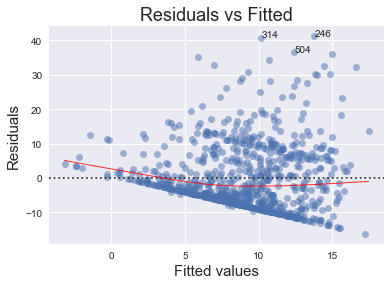

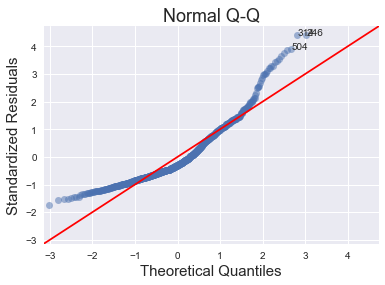

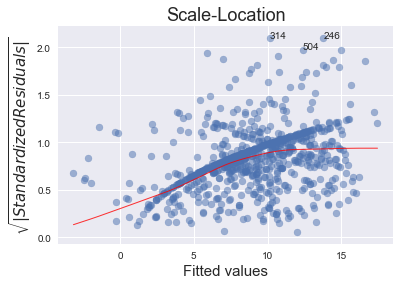

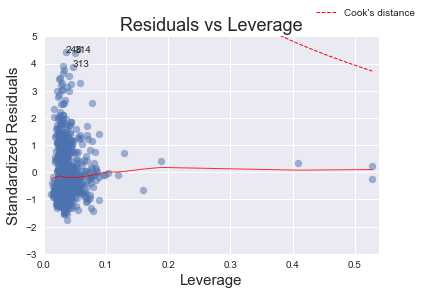

In [36]:
diagnostic_plots.diagnostic_plots(joined.drop('num_weeks', axis=1), joined['num_weeks'], fit)

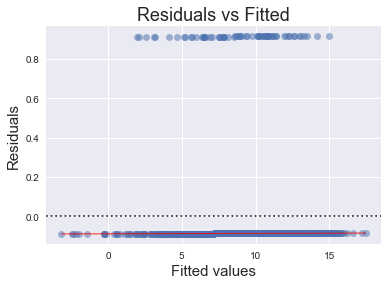

In [37]:
# model values
model_fitted_y = fit.fittedvalues
# model residuals
model_residuals = fit.resid
# normalized residuals
model_norm_residuals = fit.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = fit.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = fit.get_influence().cooks_distance[0]

plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, joined.columns[-1], data=joined,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

### Scaled x_train

In [ ]:
joined.drop('Unnamed: 0',1, inplace = True, errors = 'ignore')
joined.columns


In [ ]:
#joined.info()
y

In [ ]:
joined.dropna(inplace = True)

In [38]:
X = joined.drop(['artist', 'song', 'num_weeks', 'index_y'], 1, errors = 'ignore')
print(X.columns)

y = joined.num_weeks
#print(X.columns)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
#print((y_train))
ss_x = StandardScaler()
X_train_scaled = ss_x.fit_transform(X_train)
X_train_scaled = pd.DataFrame(ss_x.fit_transform(X_train), columns=X.columns, index=X_train.index)
#print((X_train_scaled))
X_test_scaled = ss_x.transform(X_test)

"""X_train_scaled.rename(columns = {0:'acousticness', 1:'danceability', 2:'duration_ms', 3:'energy',
       4:'instrumentalness', 5:'liveness', 6:'loudness', 7:'mode', 8:'popularity',
       9:'speechiness', 10:'tempo', 11:'time_signature', 12:'valence', 13:'is_rock',
       14:'is_hiphop', 15:'is_country', 16:'is_easy', 17:'is_pop', 18:'is_edm', 19:'key_0',
       20:'key_1', 21:'key_2', 22:'key_3',23: 'key_4', 24:'key_5', 25:'key_6', 26:'key_7', 27:'key_8',
       28:'key_9', 29:'key_10'}, inplace = True)
"""
#print(X_train_scaled)
#train_scaled_with_weeks = X_train_scaled.copy(deep = True)
#print(y_train)
#train_scaled_with_weeks['num_weeks'] = y_train
#print(train_scaled_with_weeks.head(20))
#train_scaled_with_weeks.columns
#train_df_scaled = X_train_scaled


Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'mode', 'popularity',
       'speechiness', 'tempo', 'time_signature', 'valence', 'is_rock',
       'is_hiphop', 'is_country', 'is_easy', 'is_pop', 'is_edm', 'key_0',
       'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_5.28696741855',
       'key_6', 'key_7', 'key_8', 'key_9', 'key_10'],
      dtype='object')


"X_train_scaled.rename(columns = {0:'acousticness', 1:'danceability', 2:'duration_ms', 3:'energy',\n       4:'instrumentalness', 5:'liveness', 6:'loudness', 7:'mode', 8:'popularity',\n       9:'speechiness', 10:'tempo', 11:'time_signature', 12:'valence', 13:'is_rock',\n       14:'is_hiphop', 15:'is_country', 16:'is_easy', 17:'is_pop', 18:'is_edm', 19:'key_0',\n       20:'key_1', 21:'key_2', 22:'key_3',23: 'key_4', 24:'key_5', 25:'key_6', 26:'key_7', 27:'key_8',\n       28:'key_9', 29:'key_10'}, inplace = True)\n"

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
#print((y_train))
ss_x = StandardScaler()
X_train_scaled = pd.DataFrame(ss_x.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
#print((X_train_scaled))
X_test_scaled = ss_x.transform(X_test)

"""X_train_scaled.rename(columns = {0:'acousticness', 1:'danceability', 2:'duration_ms', 3:'energy',
       4:'instrumentalness', 5:'liveness', 6:'loudness', 7:'mode', 8:'popularity',
       9:'speechiness', 10:'tempo', 11:'time_signature', 12:'valence', 13:'is_rock',
       14:'is_hiphop', 15:'is_country', 16:'is_easy', 17:'is_pop', 18:'is_edm', 19:'key_0',
       20:'key_1', 21:'key_2', 22:'key_3',23: 'key_4', 24:'key_5', 25:'key_6', 26:'key_7', 27:'key_8',
       28:'key_9', 29:'key_10'}, inplace = True)
"""
#print(X_train_scaled)
train_scaled_with_weeks = X_train_scaled.copy(deep = True)
#print(y_train)
train_scaled_with_weeks['num_weeks'] = y_train
#print(X_train_scaled_with_weeks.head(20))
train_scaled_with_weeks
#train_df_scaled = X_train_scaled


,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,popularity,speechiness,...,key_3,key_4,key_5,key_5.28696741855,key_6,key_7,key_8,key_9,key_10,num_weeks
96,-0.884883,-0.866381,0.644052,0.605721,-0.128205,1.257307,0.914205,-1.261980,0.449107,-0.821853,...,-0.147979,-0.246183,-0.262111,-0.073389,-0.281066,-0.295599,-0.333333,-0.288396,-0.292013,6.0
763,0.385799,-0.831148,-0.932633,-0.270561,-0.128205,-0.563569,-0.137810,-1.261980,1.030536,2.573281,...,-0.147979,-0.246183,-0.262111,-0.073389,-0.281066,-0.295599,-0.333333,-0.288396,3.424511,1.0
188,-0.845404,-0.309699,0.310791,-0.339412,-0.128205,-0.429682,-0.902871,0.792406,1.353552,2.079361,...,-0.147979,-0.246183,-0.262111,-0.073389,-0.281066,-0.295599,-0.333333,-0.288396,-0.292013,2.0
148,0.249988,-0.295605,-0.233373,0.223912,-0.128123,-0.653721,0.079720,0.792406,0.255298,-0.758023,...,6.757712,-0.246183,-0.262111,-0.073389,-0.281066,-0.295599,-0.333333,-0.288396,-0.292013,1.0
686,-0.124665,-0.316745,2.245752,-1.866646,-0.128114,-0.510014,-1.397637,-1.261980,-1.295178,-0.520181,...,-0.147979,-0.246183,-0.262111,-0.073389,3.557884,-0.295599,-0.333333,-0.288396,-0.292013,20.0
254,-0.509153,-0.274466,3.708999,1.669778,-0.128205,-0.286868,1.434890,0.792406,0.513711,2.033768,...,-0.147979,-0.246183,-0.262111,-0.073389,-0.281066,3.382964,-0.333333,-0.288396,-0.292013,1.0
736,-0.683835,-0.640890,-1.545723,-0.326893,-0.128172,-0.251164,-1.411522,0.792406,-0.261527,1.638632,...,-0.147979,-0.246183,-0.262111,-0.073389,-0.281066,-0.295599,-0.333333,-0.288396,-0.292013,1.0
522,0.104810,-0.295605,-0.457035,0.073693,-0.128205,-0.701028,0.007519,0.792406,-0.196924,-0.748904,...,-0.147979,-0.246183,-0.262111,-0.073389,3.557884,-0.295599,-0.333333,-0.288396,-0.292013,20.0
255,-0.548960,0.028539,-0.175456,1.256673,-0.128205,-0.483237,1.477934,-1.261980,-0.067718,-0.517142,...,-0.147979,-0.246183,-0.262111,-0.073389,-0.281066,-0.295599,-0.333333,3.467457,-0.292013,9.0
145,3.153547,-0.274466,0.781209,-3.501538,-0.128116,-0.536792,-3.547489,0.792406,-0.326131,-0.787658,...,-0.147979,4.062019,-0.262111,-0.073389,-0.281066,-0.295599,-0.333333,-0.288396,-0.292013,2.0


In [40]:
X_train_scaled.fillna(X_train_scaled.mean(),inplace = True)

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,popularity,speechiness,...,key_2,key_3,key_4,key_5,key_5.28696741855,key_6,key_7,key_8,key_9,key_10
96,-0.884883,-0.866381,0.644052,0.605721,-0.128205,1.257307,0.914205,-1.261980,0.449107,-0.821853,...,3.265986,-0.147979,-0.246183,-0.262111,-0.073389,-0.281066,-0.295599,-0.333333,-0.288396,-0.292013
763,0.385799,-0.831148,-0.932633,-0.270561,-0.128205,-0.563569,-0.137810,-1.261980,1.030536,2.573281,...,-0.306186,-0.147979,-0.246183,-0.262111,-0.073389,-0.281066,-0.295599,-0.333333,-0.288396,3.424511
188,-0.845404,-0.309699,0.310791,-0.339412,-0.128205,-0.429682,-0.902871,0.792406,1.353552,2.079361,...,-0.306186,-0.147979,-0.246183,-0.262111,-0.073389,-0.281066,-0.295599,-0.333333,-0.288396,-0.292013
148,0.249988,-0.295605,-0.233373,0.223912,-0.128123,-0.653721,0.079720,0.792406,0.255298,-0.758023,...,-0.306186,6.757712,-0.246183,-0.262111,-0.073389,-0.281066,-0.295599,-0.333333,-0.288396,-0.292013
686,-0.124665,-0.316745,2.245752,-1.866646,-0.128114,-0.510014,-1.397637,-1.261980,-1.295178,-0.520181,...,-0.306186,-0.147979,-0.246183,-0.262111,-0.073389,3.557884,-0.295599,-0.333333,-0.288396,-0.292013
254,-0.509153,-0.274466,3.708999,1.669778,-0.128205,-0.286868,1.434890,0.792406,0.513711,2.033768,...,-0.306186,-0.147979,-0.246183,-0.262111,-0.073389,-0.281066,3.382964,-0.333333,-0.288396,-0.292013
736,-0.683835,-0.640890,-1.545723,-0.326893,-0.128172,-0.251164,-1.411522,0.792406,-0.261527,1.638632,...,-0.306186,-0.147979,-0.246183,-0.262111,-0.073389,-0.281066,-0.295599,-0.333333,-0.288396,-0.292013
522,0.104810,-0.295605,-0.457035,0.073693,-0.128205,-0.701028,0.007519,0.792406,-0.196924,-0.748904,...,-0.306186,-0.147979,-0.246183,-0.262111,-0.073389,3.557884,-0.295599,-0.333333,-0.288396,-0.292013
255,-0.548960,0.028539,-0.175456,1.256673,-0.128205,-0.483237,1.477934,-1.261980,-0.067718,-0.517142,...,-0.306186,-0.147979,-0.246183,-0.262111,-0.073389,-0.281066,-0.295599,-0.333333,3.467457,-0.292013
145,3.153547,-0.274466,0.781209,-3.501538,-0.128116,-0.536792,-3.547489,0.792406,-0.326131,-0.787658,...,-0.306186,-0.147979,4.062019,-0.262111,-0.073389,-0.281066,-0.295599,-0.333333,-0.288396,-0.292013


In [58]:
joined

,num_weeks,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,popularity,...,key_2,key_3,key_4,key_5,key_5.28696741855,key_6,key_7,key_8,key_9,key_10
0,12.0,0.12200,0.796,255.560,0.513,0.000000,0.1500,-7.140,0.0,83.0,...,0,0,0,0,0,1,0,0,0,0
1,2.0,0.73800,0.781,234.667,0.810,0.000000,0.1440,-4.301,0.0,83.0,...,0,0,0,0,0,0,0,0,0,1
2,2.0,0.24700,0.888,225.893,0.515,0.000000,0.4460,-6.246,1.0,83.0,...,0,0,0,0,0,0,0,0,0,0
3,20.0,0.02630,0.841,210.200,0.516,0.000720,0.1110,-7.461,0.0,83.0,...,0,0,0,0,0,0,0,0,0,0
4,28.0,0.01510,0.884,220.307,0.346,0.000007,0.0871,-8.228,0.0,84.0,...,0,0,0,0,0,0,0,1,0,0
5,1.0,0.44200,0.739,147.987,0.405,0.211000,0.1580,-10.897,1.0,84.0,...,0,0,0,0,0,0,0,0,0,0
6,2.0,0.09740,0.862,148.640,0.274,0.185000,0.1830,-5.818,0.0,84.0,...,0,0,0,0,0,0,0,0,0,0
7,7.0,0.33100,0.782,268.933,0.436,0.000013,0.3420,-7.033,1.0,84.0,...,1,0,0,0,0,0,0,0,0,0
8,1.0,0.37300,0.835,258.880,0.413,0.001330,0.1010,-9.810,1.0,84.0,...,0,0,0,0,0,0,0,0,0,0
9,3.0,0.00525,0.845,257.600,0.399,0.740000,0.1020,-7.509,1.0,84.0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
## Drake
drake = pd.read_pickle('Canadian_hiphop/Drake_for_testing_model.pkl')
drake.drop(['analysis_url', 'id', 'track_href', 'type', 'uri'], axis = 1, inplace = True, errors = 'ignore')
drake

,acousticness,artist,danceability,duration_ms,energy,genre,instrumentalness,key,liveness,loudness,mode,popularity,song,speechiness,tempo,time_signature,valence
0,0.00623,Drake,0.735,217933,0.482,"[canadian hip hop, canadian pop, hip hop, pop ...",0.0144,8,0.448,-9.445,1,100,In My Feelings,0.139,181.995,4,0.315


In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
#print((y_train))
ss_x = StandardScaler()
X_train_scaled = pd.DataFrame(ss_x.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
#print((X_train_scaled))
X_test_scaled = ss_x.transform(X_test)

"""X_train_scaled.rename(columns = {0:'acousticness', 1:'danceability', 2:'duration_ms', 3:'energy',
       4:'instrumentalness', 5:'liveness', 6:'loudness', 7:'mode', 8:'popularity',
       9:'speechiness', 10:'tempo', 11:'time_signature', 12:'valence', 13:'is_rock',
       14:'is_hiphop', 15:'is_country', 16:'is_easy', 17:'is_pop', 18:'is_edm', 19:'key_0',
       20:'key_1', 21:'key_2', 22:'key_3',23: 'key_4', 24:'key_5', 25:'key_6', 26:'key_7', 27:'key_8',
       28:'key_9', 29:'key_10'}, inplace = True)
"""
#print(X_train_scaled)
train_scaled_with_weeks = X_train_scaled.copy(deep = True)
#print(y_train)
train_scaled_with_weeks['num_weeks'] = y_train
#print(X_train_scaled_with_weeks.head(20))
train_scaled_with_weeks
#train_df_scaled = X_train_scaled


In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor()

param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [4, 5, 6],
    'min_samples_leaf': [20, 25, 30, 50, 70]
}
grid = GridSearchCV(rf, param_grid=param_grid, scoring='neg_mean_squared_error')
grid.fit(X_train_scaled, y_train)
print(grid.score(X_train_scaled,y_train))
y_predict = grid.predict(X_train_scaled)
np.sqrt(mean_squared_error(np.round(y_predict), y_train))

-85.5494736978


9.2458484892255441

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor()

param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [4, 5, 6],
    'min_samples_leaf': [20, 25, 30, 50, 70]
}
grid = GridSearchCV(rf, param_grid=param_grid, scoring='neg_mean_squared_error')
grid.fit(X_train_scaled, y_train)
print(grid.score(X_test_scaled,y_test))
y_predict = grid.predict(X_test_scaled)
np.sqrt(mean_squared_error(np.round(y_predict), y_test))

-92.6865308175


9.6108945788521236

In [54]:
y_test

779     5.0
744     1.0
31      5.0
752     1.0
340    20.0
503    19.0
661     2.0
402    20.0
705    39.0
602     1.0
662    41.0
200     1.0
549    20.0
466     2.0
208     1.0
332     2.0
53     17.0
711    11.0
328     2.0
307     1.0
512    16.0
156     6.0
291    28.0
29     24.0
560     1.0
420     1.0
605     4.0
81     12.0
551    22.0
155    17.0
       ... 
173    14.0
224     1.0
556     9.0
228    11.0
133     1.0
392    26.0
695     1.0
475    19.0
65      1.0
783     1.0
146    19.0
508     1.0
721    19.0
614     6.0
154    14.0
384     2.0
756     8.0
337    12.0
266     7.0
751    11.0
546    12.0
319     1.0
659    19.0
716     1.0
169     4.0
16      8.0
142     4.0
507    12.0
365     1.0
309    13.0
Name: num_weeks, Length: 241, dtype: float64

# NOW this is my baseline model finally

In [ ]:
#train_scaled_with_weeks['num_weeks2'] = train_scaled_with_weeks['num_weeks']**2

equation = 'num_weeks ~ acousticness  + danceability + duration_ms + energy + instrumentalness + liveness + loudness + mode + popularity + speechiness + tempo + time_signature + valence + is_rock + is_hiphop + is_country + is_easy + is_pop + is_edm + key_0 + key_1+ key_2 + key_3 + key_4 + key_5 + key_6 + key_7 + key_8 + key_9 + key_10'
#y, X = patsy.dmatrices(equation, data=train_df, return_type="dataframe")

# Create your model
model = smf.ols(equation, data = train_scaled_with_weeks)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

In [ ]:
#train_scaled_with_weeks = copy

In [ ]:
train_scaled_with_weeks.corr().num_weeks.sort_values()

In [ ]:
joined.num_weeks.hist()

In [59]:
#train_scaled_with_weeks['num_weeks2'] = train_scaled_with_weeks['num_weeks']**2

equation = 'num_weeks ~ acousticness  + danceability*is_hiphop*is_pop + duration_ms + energy*valence*danceability + instrumentalness + liveness + loudness + mode + popularity + speechiness + tempo + is_edm + key_0 + key_1+ key_2 + key_3 + key_4 + key_5 + key_6 + key_7 + key_9 + key_10' 
#y, X = patsy.dmatrices(equation, data=train_df, return_type="dataframe")

# Create your model
model = smf.ols(equation, data = train_scaled_with_weeks)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              num_weeks   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     2.764
Date:                Fri, 20 Jul 2018   Prob (F-statistic):           1.09e-06
Time:                        09:08:42   Log-Likelihood:                -2034.9
No. Observations:                 560   AIC:                             4138.
Df Residuals:                     526   BIC:                             4285.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         9.2445      0.495     18.683      0.000       8.272      10.217
acousticness                     -1.7896      0.503     -3.555      0.000      -2.779      -0.801
danceability                     -0.3232      0.551     -0.587      0.558      -1.405       0.759
is_hiphop                        -1.5694      0.522     -3.006      0.003      -2.595      -0.544
danceability:is_hiphop            0.1225      0.462      0.265      0.791      -0.785       1.030
is_pop                            0.8658      0.513      1.688      0.092      -0.142       1.873
danceability:is_pop              -0.1669      0.460     -0.363      0.717      -1.071       0.737
is_hiphop:is_pop                 -0.0476      0.494     -0.096      0.923      -1.018       0.922
danceability:is_hiphop:is_pop     0.7055      0.456      1.547      0.122      -0.190       1.601
duration_ms                       0.3480      0.428      0.813      0.417      -0.493       1.189
energy                           -1.9356      0.709     -2.731      0.007      -3.328      -0.543
valence                           1.9066      0.522      3.650      0.000       0.880       2.933
energy:valence                   -0.2343      0.442     -0.530      0.597      -1.103       0.635
energy:danceability               0.1338      0.492      0.272      0.786      -0.832       1.100
valence:danceability             -0.0723      0.462     -0.156      0.876      -0.980       0.835
energy:valence:danceability       0.5388      0.418      1.288      0.198      -0.283       1.361
instrumentalness                 -0.4918      0.415     -1.185      0.237      -1.307       0.324
liveness                         -0.6573      0.416     -1.579      0.115      -1.475       0.161
loudness                          0.8571      0.625      1.372      0.171      -0.370       2.085
mode                              0.8903      0.435      2.045      0.041       0.035       1.745
popularity                        0.6649      0.493      1.349      0.178      -0.303       1.633
speechiness                      -1.4936      0.484     -3.084      0.002      -2.445      -0.542
tempo                            -0.6219      0.428     -1.453      0.147      -1.463       0.219
is_edm                           -1.0712      0.529     -2.024      0.044      -2.111      -0.031
key_0                            -0.5745      0.474     -1.212      0.226      -1.505       0.357
key_1                            -0.4053      0.514     -0.789      0.431      -1.415       0.604
key_2                            -0.0742      0.481     -0.154      0.877      -1.018       0.870
key_3                            -0.1448      0.426     -0.340      0.734      -0.981       0.692
key_4                            -0.6366     

Fiddling around with some feature selection

In [ ]:
#train_scaled_with_weeks['num_weeks2'] = train_scaled_with_weeks['num_weeks']**2

equation = 'num_weeks ~ acousticness  + is_hiphop*is_pop + duration_ms + energy*valence + instrumentalness + liveness + loudness + mode + popularity + speechiness + tempo + is_edm + key_0 + key_1+ key_2 + key_3 + key_4 + key_5 + key_6 + key_7 + key_9 + key_10' 
#y, X = patsy.dmatrices(equation, data=train_df, return_type="dataframe")

# Create your model
model = smf.ols(equation, data = train_scaled_with_weeks)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

In [ ]:
#train_scaled_with_weeks['num_weeks2'] = train_scaled_with_weeks['num_weeks']**2

equation = 'num_weeks ~ acousticness+ danceability + duration_ms + energy + instrumentalness + liveness + loudness + mode + popularity*is_hiphop + tempo + valence + is_pop + is_edm + key_0 + key_1+ key_2 + key_3 + key_4 + key_5 + key_6 + key_7 + key_9'
#y, X = patsy.dmatrices(equation, data=train_df, return_type="dataframe")

# Create your model
model = smf.ols(equation, data = train_scaled_with_weeks)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

This is the one where I got the highest adjusted rsquared

In [ ]:
#train_scaled_with_weeks['num_weeks2'] = train_scaled_with_weeks['num_weeks']**2

equation = 'num_weeks ~ acousticness+ danceability + duration_ms + energy + instrumentalness + liveness + loudness + mode + popularity*is_hiphop*speechiness + tempo + valence + is_pop + is_edm + key_0 + key_1+ key_2 + key_3 + key_4 + key_5 + key_6 + key_7 + key_9'
#y, X = patsy.dmatrices(equation, data=train_df, return_type="dataframe")

# Create your model
model = smf.ols(equation, data = train_scaled_with_weeks)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

In [ ]:
train_scaled_with_weeks.danceability.hist()

In [ ]:
sns.pairplot(train_scaled_with_weeks, vars = ['popularity', 'is_hiphop', 'speechiness'])

In [ ]:
lr_train_df = train_scaled_with_weeks.copy(deep = True)

lr_train_df['danceability'] = np.log(train_scaled_with_weeks['danceability'] + 1)

In [ ]:
train_scaled_with_weeks.corr()

In [ ]:
sns.pairplot(lr_train_df, vars = ['danceability', 'energy', 'tempo', 'valence', 'num_weeks'])

In [ ]:
sns.heatmap(train_scaled_with_weeks.corr())

In [ ]:
diagnostic_plots.diagnostic_plots(train_scaled_with_weeks.drop('num_weeks', axis=1), np.log(train_scaled_with_weeks['num_weeks']+1), fit)

From these plots, I can tell that my data is skewed, and I need to do something to normalize it

In [ ]:
train_scaled_with_weeks.dropna(inplace = True)

In [ ]:
y_train.drop('key_5.28696741855', axis =1, inplace=True)

In [ ]:
y_train

In [ ]:
equation = 'num_weeks ~ acousticness  + danceability + energy + loudness + mode + popularity + speechiness + tempo + valence + is_hiphop + is_pop + is_edm + key_0 + key_4 + key_7 + key_8'


In [66]:
#train_scaled_with_weeks['num_weeks2'] = train_scaled_with_weeks['num_weeks']**2

equation = 'num_weeks ~ acousticness  + danceability*is_hiphop*is_pop + energy*valence*danceability + loudness + mode + popularity + speechiness + tempo + is_edm + key_0 + key_7 + key_8' 
#y, X = patsy.dmatrices(equation, data=train_df, return_type="dataframe")

# Create your model
model = smf.ols(equation, data = train_scaled_with_weeks)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              num_weeks   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     3.516
Date:                Fri, 20 Jul 2018   Prob (F-statistic):           1.05e-07
Time:                        09:18:49   Log-Likelihood:                -2040.3
No. Observations:                 560   AIC:                             4129.
Df Residuals:                     536   BIC:                             4233.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         9.2500      0.493     18.772      0.000       8.282      10.218
acousticness                     -1.7706      0.498     -3.553      0.000      -2.750      -0.792
danceability                     -0.2775      0.547     -0.508      0.612      -1.352       0.796
is_hiphop                        -1.5905      0.509     -3.124      0.002      -2.591      -0.590
danceability:is_hiphop            0.1711      0.456      0.376      0.707      -0.724       1.066
is_pop                            0.9622      0.510      1.887      0.060      -0.039       1.964
danceability:is_pop              -0.2011      0.453     -0.444      0.657      -1.091       0.689
is_hiphop:is_pop                 -0.0889      0.485     -0.183      0.855      -1.042       0.864
danceability:is_hiphop:is_pop     0.6701      0.450      1.489      0.137      -0.214       1.554
energy                           -1.8841      0.705     -2.673      0.008      -3.269      -0.499
valence                           1.9596      0.519      3.774      0.000       0.939       2.980
energy:valence                   -0.2380      0.435     -0.547      0.585      -1.093       0.617
energy:danceability               0.1585      0.488      0.325      0.745      -0.800       1.117
valence:danceability             -0.1094      0.457     -0.239      0.811      -1.008       0.789
energy:valence:danceability       0.5356      0.410      1.308      0.191      -0.269       1.340
loudness                          0.9201      0.619      1.487      0.138      -0.295       2.136
mode                              0.8611      0.414      2.080      0.038       0.048       1.674
popularity                        0.5708      0.489      1.168      0.244      -0.390       1.531
speechiness                      -1.4823      0.478     -3.099      0.002      -2.422      -0.543
tempo                            -0.7584      0.425     -1.786      0.075      -1.592       0.076
is_edm                           -1.0214      0.525     -1.945      0.052      -2.053       0.010
key_0                            -0.5774      0.414     -1.395      0.164      -1.390       0.236
key_7                            -0.6561      0.410     -1.601      0.110      -1.461       0.149
key_8                            -0.0180      0.410     -0.044      0.965      -0.824       0.788
==============================================================================
Omnibus:                      117.869   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.163
Skew:                           1.243   Prob(JB):                     6.28e-46
Kurtosis:                       4.655   Cond. No.                         3.98
==========================================

In [76]:
hello = X_train_scaled[['danceability', 'energy', 'loudness','popularity', 'valence',
                                 'is_hiphop','is_pop','is_edm']]

In [79]:
linear_model = LinearRegression()
linear_model.fit(hello , y_train)
linear_model.score(X_test_scaled[['danceability', 'energy', 'loudness','popularity', 'valence',
                                 'is_hiphop','is_pop','is_edm']], y_test)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

Linear Regression Base Model

In [43]:
# 5-fold cross-validation with crap data :(
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures

model = LinearRegression()
scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# scores output is negative, a sklearn quirk bc mse is used to min. optimization func.
print(np.sqrt(-scores))

[  8.55495861  11.60899868   8.99966492   9.37960682  10.20757531]


In [44]:
# 5-fold cross-validation with crap data :(
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures

model = LinearRegression()
scores = cross_val_score(model, X_test_scaled, y_test, cv=5, scoring='neg_mean_squared_error')

# scores output is negative, a sklearn quirk bc mse is used to min. optimization func.
print(np.sqrt(-scores))

[ 11.61432698  11.20260049  11.87343943   9.0977812    8.54975939]


Linear Regression Base Model with logged num_weeks

In [ ]:
# 5-fold cross-validation with crap data :(
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures

model = LinearRegression()
scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# scores output is negative, a sklearn quirk bc mse is used to min. optimization func.
print(np.sqrt(-scores))

In [ ]:
X_train_scaled.shape

In [ ]:
model.fit(X_train_scaled, y_train)
predicted = model.predict(X_test_scaled)
plt.scatter(y_test,model.predict(X_test_scaled));

In [ ]:
# 5-fold cross-validation with crap data :(
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures


model = LinearRegression()
scores = cross_val_score(model, X_train_scaled[['danceability' ,'energy', 'popularity', 'is_pop',
                                                'is_edm', 'speechiness', 'loudness']],
                                                np.log(y_train + 1), cv=5, scoring='neg_mean_squared_error')

# scores output is negative, a sklearn quirk bc mse is used to min. optimization func.
print(np.sqrt(-scores))

In [ ]:
# Set up the plot
# Set up the plot
fig,ax = plt.subplots(1,1)
# Set the degree of our polynomial
degree = 3

# Generate the model type with make_pipeline
# This tells it the first step is to generate 3rd degree polynomial features in the input features and then run
# a linear regression on the resulting features
est = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit our model to the training data
est.fit(X_train_scaled, y_train)
# Plot the results
plot_approximation(est, ax, label='degree=%d' % degree)

# Plot the results of a pipeline against ground truth and actual data
def plot_approximation(est, ax, label=None):
    """Plot the approximation of ``est`` on axis ``ax``. """
    ax.plot(x_plot, f(x_plot), label='ground truth', color='green')
    ax.scatter(X, y, s=100)
    ax.plot(x_plot, est.predict(x_plot[:, np.newaxis]), color='red', label=label)
    ax.set_ylim((-2, 2))
    ax.set_xlim((0, 1))
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend(loc='upper right',frameon=True)

In [ ]:
sns.residplot(train_scaled_with_weeks.drop('num_weeks'), train_scaled_with_weeks['num_weeks'])

In [ ]:
sns.heatmap(train_scaled_with_weeks.corr())

In [ ]:
quad = PolynomialFeatures(degree=2)
X_train_scaled_quad = quad.fit_transform(X_train_scaled)

scores = cross_val_score(quad, X_train_scaled, np.log(1 + y_train), cv=5, scoring='neg_mean_squared_error')
print(np.sqrt(-scores))

Poly with degree 2

In [ ]:
from sklearn.metrics import mean_squared_error

quad = PolynomialFeatures(degree=2)
X_train_scaled_quad = quad.fit_transform(X_train_scaled)

model.fit(X_train_scaled_quad, np.log(y_train + 1))
y_predict = model.predict(X_train_scaled_quad)
np.sqrt(mean_squared_error(y_predict, np.log(y_train + 1)))

In [ ]:
#X_train_scaled

Poly with degree 3

In [ ]:
from sklearn.metrics import mean_squared_error

quad = PolynomialFeatures(degree=3)
X_train_scaled_quad = quad.fit_transform(X_train_scaled)

model.fit(X_train_scaled_quad, y_train)
y_predict = model.predict(X_train_scaled_quad)
np.sqrt(mean_squared_error(y_predict, y_train))

## Let's try some polynomials

In [ ]:
#Adding Polynomials

kf = KFold(len(X_train), n_folds=5, shuffle=True, random_state=12)
degrees = range(1,4)

r2_mean_train = {}
r2_mean_test = {}

for degree in degrees:
   r2_test_scores = []
   r2_train_scores = []
   
   for train, test in kf:
       X_train_cv = X_train_scaled.iloc[train]
       y_train_cv = y_train.iloc[train]
       X_test_cv = X_train_scaled.iloc[test]
       y_test_cv = y_train.iloc[test]

       est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
       est.fit(X_train_scaled, y_train)
       r2_train = est.score(X_train_scaled, y_train)
       r2_test = est.score(X_test_scaled, y_test)

       r2_test_scores.append(r2_test)
       r2_train_scores.append(r2_train)
   
   r2_mean_train[degree] = np.mean(r2_train_scores)
   r2_mean_test[degree] = np.mean(r2_test_scores)
       
r2_mean_train, r2_mean_test

## Lasso

In [ ]:
from sklearn.linear_model import LassoCV, RidgeCV

alphas = [10**x for x in range(-6,6)]
lasso = LassoCV(alphas=alphas, cv = 5, max_iter=4000)

print(lasso.fit(X_train_scaled, y_train))

In [ ]:
from sklearn.linear_model import LassoCV, RidgeCV

alphas = [10**x for x in range(-6,6)]
lasso = LassoCV(alphas=alphas, cv = 5, max_iter=4000)

lasso.fit(X_train_scaled, y_train)

In [ ]:
lasso.coef_

In [ ]:
print(list(zip(lasso.coef_, X_train_scaled.columns)))

print(lasso.alpha_)

In [ ]:
y_predict = lasso.predict(X_train_scaled)
np.sqrt(mean_squared_error(y_predict, y_train))

## Plot Approximation function from lecture

In [ ]:
def plot_approximation(est, ax, label=None):
    """Plot the approximation of ``est`` on axis ``ax``. """
    ax.plot(x_plot, f(x_plot), label='ground truth', color='green')
    ax.scatter(X, y, s=100)
    ax.plot(x_plot, est.predict(x_plot[:, np.newaxis]), color='red', label=label)
    ax.set_ylim((-2, 2))
    ax.set_xlim((0, 1))
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend(loc='upper right',frameon=True)


In [ ]:
#From Lecture me trying to plot these Lassos LOL
# from sklearn.linear_model import Lasso

# # Create only 2 plot rows, only trying |2 alphas
# fig, ax_rows = plt.subplots(2, 2, figsize=(15, 10))


# # Plot the results next to the coefficient values for each of hte 2 alphas
# degree = 1
# alphas = [1e-3, 1e-2]
# for alpha, ax_row in zip(alphas, ax_rows):
#     ax_left, ax_right = ax_row
#     est = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=alpha))
#     est.fit(X_train_scaled, y_train)
#     plot_approximation(est, ax_left, label='alpha=%r' % alpha)
#     plot_coefficients(est, ax_right, label='Lasso(alpha=%r) coefficients' % alpha, yscale=None)
#     ax_right.set_ylim((1e-1, 15))

# plt.tight_layout()

## Ridge

In [ ]:
from sklearn.linear_model import LassoCV, RidgeCV

alphas = [10**x for x in range(-6,6)]
ridge = RidgeCV(alphas=alphas, cv = 5)

ridge.fit(X_train_scaled_quad, y_train)

In [ ]:
y_predict = ridge.predict(X_train_scaled_quad)
np.sqrt(mean_squared_error(y_predict, y_train))

In [ ]:
ridge.alpha_

In [ ]:
#sns.pairplot(train_df_scaled)

In [63]:
rf = RandomForestRegressor()
rf.fit(X_train_scaled, y_train)
rf.score(X_test_scaled, y_test)

-0.15566965158345569

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor()

param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [4, 5, 6],
    'min_samples_leaf': [20, 25, 30, 50, 70]
}
grid = GridSearchCV(rf, param_grid=param_grid, scoring='neg_mean_squared_error')
grid.fit(X_train_scaled, y_train)
print(grid.score(X_train_scaled,y_train))
y_predict = grid.predict(X_train_scaled)
np.sqrt(mean_squared_error(np.round(y_predict), y_train))

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()


param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [4, 5, 6],
    'min_samples_leaf': [20, 25, 30, 50, 70]
}

grid = GridSearchCV(gb, param_grid = param_grid, scoring='neg_mean_squared_error')
grid.fit(X_train_scaled, y_train)
print(grid.score(X_train_scaled,y_train))
y_predict = grid.predict(X_train_scaled)
np.sqrt(mean_squared_error(np.round(y_predict), y_train))


# Need to test this get the score on scaled y_test

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()


param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [4, 5, 6],
    'min_samples_leaf': [20, 25, 30, 50, 70]
}

grid = GridSearchCV(gb, param_grid = param_grid, scoring='neg_mean_squared_error')
grid.fit(X_train_scaled, y_train)
print(grid.score(X_train_scaled,y_train))
y_predict = grid.predict(X_train_scaled)
np.sqrt(mean_squared_error(np.round(y_predict), y_train))

In [ ]:
np.round(y_predict)

In [ ]:
# sum(y_train > 35)

y_train_remove_outlier = y_train[y_train < 35]
X_train_scaled_remove_outlier = X_train_scaled[y_train < 35]



In [ ]:
rf = RandomForestRegressor()

param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [4, 5, 6],
    'min_samples_leaf': [20, 25, 30, 50, 70]
}
grid = GridSearchCV(rf, param_grid=param_grid, scoring='neg_mean_squared_error')
grid.fit(X_train_scaled_remove_outlier, y_train_remove_outlier)
print(grid.score(X_train_scaled_remove_outlier,y_train_remove_outlier))
y_predict = grid.predict(X_train_scaled_remove_outlier)
np.sqrt(mean_squared_error(np.round(y_predict), y_train_remove_outlier))

In [ ]:
plt.plot(y_predict, y_train_remove_outlier, 'o')

In [ ]:
order_of_features = np.argsort(grid.best_estimator_.feature_importances_)

for name, importance in zip(X_train_scaled_remove_outlier.columns[order_of_features], grid.best_estimator_.feature_importances_[order_of_features]):
    print(name, importance)

In [ ]:
pd.read_pickle('billboards_without_week_ranks.pkl')

## Let's look at the residuals for this model fit

In [ ]:
fit.resid.plot(style='o', figsize=(12,8));

# I think I need to cross validate this base model?

In [ ]:
from sklearn.cross_validation import cross_val_score

In [ ]:
train_df_scaled.info()

In [ ]:
X_train_scaled.head(20)

In [ ]:
# 10-fold cross-validation with our fake data
reg = LinearRegression()
scores = cross_val_score(reg, X_train_scaled, y_train, cv=5, scoring='mean_squared_error')

# scores output is negative, a sklearn quirk bc mse is used to min. optimization func.
print(-scores)

# This is me attempting to do some regularization

In [ ]:
X_train_scaled
y_train

In [ ]:
kf = KFold(n=len(X), n_folds=5, shuffle=False)
alphas = [10**x for x in range(-12, 5)]
scores = np.zeros((len(alphas),1))


In [ ]:
for j in range(len(alphas)):
    kf_score = []
    for train, test in kf:
        X_train = X_train_scaled.iloc[train]
        y_train = y_train.iloc[train]
        X_test = X_train_scaled.iloc[test]
        y_test = y_tra.iloc[test]
        std_scaler = preprocessing.StandardScaler()
        X_train_norm = std_scaler.fit_transform(X_train)
        X_test_norm = std_scaler.transform(X_test)
    
        model =  Lasso(alpha = alphas[j])
        model.fit(X_train_norm, y_train)
        y_test_predict = model.predict(X_test_norm)
        score = mean_squared_error(y_test_predict, y_test)
        kf_score.append(score)
    scores[j] = np.mean(kf_score)
print ('mse for all alpha values \n')
print (pd.DataFrame(list(zip(alphas, scores)), columns=['alpha', 'mse']))

best_alpha = alphas[scores.argmin()]
print ('best alpha is:', best_alpha)

In [ ]:
#diagnostic plots dont work :(
diagnostic_plots.diagnostic_plots(train_df.drop('num_weeks', axis=1), train_df['num_weeks'], fit)

## doing it with sklearn

In [ ]:
linear_model = LinearRegression()
linear_model.fit(train_df.drop('num_weeks', 1), train_df['num_weeks'])
linear_model.score(train_df.drop('num_weeks', 1), train_df['num_weeks'])

In [ ]:
# Pick a coefficient d and make the features!
x_values = train_df.drop('num_weeks', 1)

def get_polynomial_features(degree, x_values):
    return PolynomialFeatures(degree=degree).fit_transform(x_values)

def get_polynomial_fit(degree, x_values, y_values):
    X = get_polynomial_features(degree, x_values)
    # we already have a column of "1"s for the intercept, 
    # so don't ask LinearRegression to make one as well
    model = LinearRegression(fit_intercept=False)
    model.fit(X, y_values)
    print("Score of the model is {}".format(model.score(X, y_values)))
    
    return model

def plot_polynomial_model(degree, x_values, y_values):
    model = get_polynomial_fit(degree, x_values, y_values)
    # plot points
    plt.plot(x_values, y_values, 'ro')
    
    # make the curve
    x_curve = np.arange(0,17,0.1).reshape(-1,1)
    X_curve = get_polynomial_features(degree, x_curve)
    y_curve = model.predict(X_curve)
    plt.plot(x_curve, y_curve)
    plt.ylim((0,160))
    


# example
get_polynomial_features(2, x_values)

In [ ]:
def plot_predict_and_points(x_values, y_values, model):
    y_predict = model.predict(x_values)

    plt.plot(x_values[:,0], y_values, 'ro')
    plt.plot(x_values[:,0], y_predict, 'b--')
    plt.xlabel('x')
    plt.ylabel('y')

In [ ]:
plot_predict_and_points(train_df.drop('num_weeks', 1), train_df['num_weeks'], linear_model)

## c r o s s v a l i d a t i o n 

In [ ]:
from sklearn.cross_validation import cross_val_score

In [ ]:
# 10-fold cross-validation with our fake data
reg = LinearRegression()
scores = cross_val_score(reg, X_train, y_train, cv=10, scoring='mean_squared_error')

# scores output is negative, a sklearn quirk bc mse is used to min. optimization func.
print(-scores)
#root mean squared errors telling us the root(mean((actual - predicted)**2)) therefore want to minimize!

In [ ]:
est=LinearRegression()

kf=KFold(n=len(X),n_folds=5,shuffle=True)

all_scores=[]

# Instead of using cross_val_score, let's use sklearn.cross_validation.KFold; this will allow
# us to 'manipulate' our training set, 

# get indices of corresponding train & test
for train,test in kf:
    x_train=X.iloc[train]
    y_train=y.iloc[train]
    x_test=X.iloc[test]
    y_test=y.iloc[test]
    pvals=[]
    sig_cols=[]
    
    for feature in x_train.columns:
        pval=f_select.f_regression(x_train[[feature]],y_train)
        if pval[1][0]<.02: 
            sig_cols.append(feature)
            pvals.append(pval[1][0])
            
    est.fit(x_train[sig_cols],y_train)
    r_2=est.score(x_test[sig_cols],y_test)
    all_scores.append(r_2)
        
#np.mean(all_scores)
    

In [ ]:
np.log(train_df.popularity + 1).hist()

In [ ]:
sns.pairplot(train_df, vars = ['num_weeks', 'popularity', 'danceability', 'is_pop', 'is_edm', 'is_hiphop'])

## Base Linear Regression Model

In [ ]:
useful_dataset_with_keys = pd.read_pickle('Modeling/dataset_used_for_modeling.pkl')

In [ ]:
#results.resid.plot(style='o', figsize=(12,8));
diagnostic_plots.diagnostic_plots(useful_dataset_with_keys.drop('num_weeks', axis=1), 
                                  useful_dataset_with_keys['num_weeks'], results)

In [ ]:
# Diagnostic Plots
import scipy.stats as stats
def diagnostic_plot(x, y):
    plt.figure(figsize=(20,5))
    
    rgr = LinearRegression()
    rgr.fit(x.reshape(-1,1),y)
    pred = rgr.predict(x.reshape(-1,1))

    plt.subplot(1, 3, 1)
    plt.scatter(x,y)
    plt.plot(x, pred, color='blue',linewidth=1)
    plt.title("Regression fit")
    plt.xlabel("x")
    plt.ylabel("y")
    
    plt.subplot(1, 3, 2)
    res = y - pred
    plt.scatter(pred, res)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    plt.subplot(1, 3, 3)
    #Generates a probability plot of sample data against the quantiles of a 
    # specified theoretical distribution 
    stats.probplot(res, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot")
    
# # Generate some data
# s = 30
# x = np.random.uniform(low=-5, high=5, size=s)

# ep = 2*np.random.randn(s)
# beta = 2
# y = beta*x + ep

# diagnostic_plot(x,y)

In [ ]:
useful_dataset_with_keys['log_num_weeks'] = np.log(useful_dataset_with_keys.num_weeks + 1).hist()
useful_dataset_with_keys.drop('num_weeks',1, inplace = True)

diagnostic_plot(X_train, y_train)

In [ ]:
type(useful_dataset_with_keys.log_num_weeks)

In [ ]:
useful_dataset_with_keys.columns

In [ ]:
diagnostic_plots.diagnostic_plots(useful_dataset_with_keys.drop('log_num_weeks', axis=1), 
                                  useful_dataset_with_keys['log_num_weeks'], results)

In [ ]:
def plot_predict_and_points(x_values, y_values, model):
    y_predict = model.predict(x_values)

    plt.plot(x_values[:,0], y_values, 'ro')
    plt.plot(x_values[:,0], y_predict, 'b--')
    plt.xlabel('x')
    plt.ylabel('y')
    
#plot_predict_and_points(x_values, y_values, linear_model)
#plt.title('This IS the line that best fits the data');

In [ ]:
# Create your feature matrix (X) and target vector (y)

equation = 'num_weeks ~ duration_ms + key + loudness + tempo + time_signature  + '
y, X = patsy.dmatrices(equation, data=joined)

model = sm.OLS(y, X)
model_fit = model.fit()
model_fit.summary()


In [ ]:
#might have to drop some columns based on how the

In [ ]:
linear_model = LinearRegression()
linear_model.fit(df.key.reshape(-1,1), useful_dataset_with_keys.num_weeks)
linear_model.score(df.key.reshape(-1,1), useful_dataset_with_keys.num_weeks)

plot_predict_and_points(df.key.reshape(-1,1), df.num_weeks, linear_model)
plt.title('This is NOT the line that best fits the data--High Bias');
plt.xlabel('Song Key');
plt.ylabel('Number of Weeks on Billboard');

#plt.savefig('first_model.png', dpi=1000) 

In [ ]:
import matplotlib.pyplot as plt

#pd.Series(fit.resid).plot(style='o', figsize=(12,8));

y_predict = model_fit.predict(X)
y_resid = y.reshape(-1,) - y_predict

#y_resid.shape
plt.plot(y.reshape(-1,), y_resid.reshape(-1,),'o');
plt.xlabel('y_true')
plt.ylabel('residual')

#plt.savefig('first_model_residual.png', dpi=1000) 

In [ ]:
linear_model = LinearRegression()
linear_model.fit(df.key.reshape(-1,1), df.num_weeks.reshape(-1,1))
linear_model.score(df.key.reshape(-1,1), df.num_weeks.reshape(-1,1))

## Robert's Diagnostic Plots

In [ ]:
# model values
model_fitted_y = model_fit.fittedvalues
#print(df.columns[-1])
#print(len(model_fitted_y))
# model residuals
model_residuals = model_fit.resid
# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]

plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, np.asarray(df.columns[-1]), data=df,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

In [ ]:
(df.num_weeks)